# Passavudhi Samrankase 

## Predicting Premier League Team Performance Using Random Forest Regression

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Load your datasets
squad_2021_2022 = pd.read_csv('Squad_2021_2022_Cleaned.csv')
squad_2022_2023 = pd.read_csv('Squad_2022_2023.csv')
squad_2023_2024 = pd.read_csv('Squad_2023_2024.csv')

# Clean and align the datasets as done previously
common_columns = set(squad_2021_2022.columns).intersection(set(squad_2022_2023.columns)).intersection(set(squad_2023_2024.columns))

squad_2021_2022_aligned = squad_2021_2022[list(common_columns)]
squad_2022_2023_aligned = squad_2022_2023[list(common_columns)]
squad_2023_2024_aligned = squad_2023_2024[list(common_columns)].copy()  # Create a copy to avoid SettingWithCopyWarning

# Combine the datasets
combined_data = pd.concat([squad_2021_2022_aligned, squad_2022_2023_aligned, squad_2023_2024_aligned])
combined_data.reset_index(drop=True, inplace=True)

# Step 1: Create the Target Variable (Points approximation)
combined_data['Points'] = combined_data['Gls'] + 0.5 * combined_data['xG']

# Step 2: Feature Selection
features = ['G-PK', 'PKatt', 'G+A', 'Ast', 'Poss', 'npxG', 'Gls', 'npxG+xAG', 'xAG', 'Age', 'PK', 'xG']
X = combined_data[features]
y = combined_data['Points']

# Step 3: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Evaluate the Model on the Testing Data
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R-squared (R²): {r2_rf}")

# Step 6: Make Predictions for the 2024-2025 Season
# Ensure 'Squad' column is removed before prediction
squad_2023_2024_prediction_features = squad_2023_2024_aligned[features]

# Add predictions to the original 2023-2024 dataset for interpretation
squad_2023_2024_aligned['Predicted_Points_2024_2025'] = rf_model.predict(squad_2023_2024_prediction_features)

# Display the results
print("\nPredicted 2024-2025 Season Outcomes using Random Forest:")
print(squad_2023_2024_aligned[['Squad', 'Predicted_Points_2024_2025']])

Random Forest Model Performance Metrics:
Mean Absolute Error (MAE): 3.082375000000004
Root Mean Squared Error (RMSE): 3.755014677623354
R-squared (R²): 0.9747073411132466

Predicted 2024-2025 Season Outcomes using Random Forest:
              Squad  Predicted_Points_2024_2025
0           Arsenal                    122.6790
1       Aston Villa                    101.8955
2       Bournemouth                     80.5565
3         Brentford                     85.6225
4          Brighton                     77.8455
5           Burnley                     61.3280
6           Chelsea                    106.3985
7    Crystal Palace                     79.7305
8           Everton                     63.4120
9            Fulham                     80.0875
10        Liverpool                    124.2440
11       Luton Town                     70.7050
12  Manchester City                    132.3865
13   Manchester Utd                     84.9255
14    Newcastle Utd                    115.7460
15 

## Predicting Premier League Team Performance Using XGBoost Regression

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load your datasets
squad_2021_2022 = pd.read_csv('Squad_2021_2022_Cleaned.csv')
squad_2022_2023 = pd.read_csv('Squad_2022_2023.csv')
squad_2023_2024 = pd.read_csv('Squad_2023_2024.csv')

# Clean and align the datasets as done previously
common_columns = set(squad_2021_2022.columns).intersection(set(squad_2022_2023.columns)).intersection(set(squad_2023_2024.columns))

squad_2021_2022_aligned = squad_2021_2022[list(common_columns)]
squad_2022_2023_aligned = squad_2022_2023[list(common_columns)]
squad_2023_2024_aligned = squad_2023_2024[list(common_columns)]

# Combine the datasets
combined_data = pd.concat([squad_2021_2022_aligned, squad_2022_2023_aligned, squad_2023_2024_aligned])
combined_data.reset_index(drop=True, inplace=True)

# Step 1: Create the Target Variable (Points approximation)
combined_data['Points'] = combined_data['Gls'] + 0.5 * combined_data['xG']

# Step 2: Feature Selection
features = ['G-PK', 'PKatt', 'G+A', 'Ast', 'Poss', 'npxG', 'Gls', 'npxG+xAG', 'xAG', 'Age', 'PK', 'xG']
X = combined_data[features]
y = combined_data['Points']

# Step 3: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Gradient Boosting Model using XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 5: Evaluate the Model on the Testing Data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate evaluation metrics for the XGBoost model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R-squared (R²): {r2_xgb}")

# Step 6: Make Predictions for the 2024-2025 Season
# Ensure 'Squad' column is removed before prediction
squad_2023_2024_prediction_features = squad_2023_2024_aligned[features]

predictions_2024_2025_xgb = xgb_model.predict(squad_2023_2024_prediction_features)

# Add predictions to the original 2023-2024 dataset for interpretation
squad_2023_2024_cleaned['Predicted_Points_2024_2025'] = predictions_2024_2025_xgb

# Display the results
print("\nPredicted 2024-2025 Season Outcomes using XGBoost:")
print(squad_2023_2024_cleaned[['Squad', 'Predicted_Points_2024_2025']])

XGBoost Model Performance Metrics:
Mean Absolute Error (MAE): 3.8638423283894867
Root Mean Squared Error (RMSE): 5.918797069005547
R-squared (R²): 0.9371597203303786

Predicted 2024-2025 Season Outcomes using XGBoost:
              Squad  Predicted_Points_2024_2025
0           Arsenal                  124.058243
1       Aston Villa                  103.635818
2       Bournemouth                   80.314697
3         Brentford                   82.994377
4          Brighton                   78.297226
5           Burnley                   60.685783
6           Chelsea                  108.247025
7    Crystal Palace                   80.414413
8           Everton                   63.894409
9            Fulham                   79.676025
10        Liverpool                  111.617813
11       Luton Town                   70.294250
12  Manchester City                  134.181931
13   Manchester Utd                   85.153336
14    Newcastle Utd                  107.160690
15  Nott'ham F

## Training a Random Forest Model and Analyzing Feature Importance

In [51]:
import pandas as pd

# Example: Define and train the Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
best_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_rf_model.fit(X_train, y_train)
# Assuming best_rf_model is already defined and trained
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Creating a DataFrame for easy visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

     Feature  Importance
6        Gls    0.308019
8        xAG    0.212931
0       G-PK    0.129527
7   npxG+xAG    0.101941
3        Ast    0.076824
5       npxG    0.076777
11        xG    0.065899
2        G+A    0.008667
4       Poss    0.008567
1      PKatt    0.006656
10        PK    0.002478
9        Age    0.001714


## Predicting Football Match Outcomes Using Random Forest Classification

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the datasets
file_path_2021_2022 = 'Squad_2021_2022_Cleaned.csv'
file_2022_2023_path = 'Squad_2022_2023.csv'
file_2023_2024_path = 'Squad_2023_2024.csv'

data_2021_2022 = pd.read_csv(file_path_2021_2022)
data_2022_2023 = pd.read_csv(file_2022_2023_path)
data_2023_2024 = pd.read_csv(file_2023_2024_path)

# Add a column for win/loss (1 for win, 0 for loss) based on whether the team scored more than average goals
data_2021_2022['Win'] = (data_2021_2022['Gls'] > data_2021_2022['Gls'].mean()).astype(int)
data_2022_2023['Win'] = (data_2022_2023['Gls'] > data_2022_2023['Gls'].mean()).astype(int)
data_2023_2024['Win'] = (data_2023_2024['Gls'] > data_2023_2024['Gls'].mean()).astype(int)

# Feature selection: Selecting relevant features based on the columns present in all datasets
selected_features = ['Poss', 'xG', 'xAG', 'G+A']

# Prepare training data
X_train_2021_2022 = data_2021_2022[selected_features]
y_train_2021_2022 = data_2021_2022['Win']

X_train_2022_2023 = data_2022_2023[selected_features]
y_train_2022_2023 = data_2022_2023['Win']

X_train_2023_2024 = data_2023_2024[selected_features]
y_train_2023_2024 = data_2023_2024['Win']

# Combine data for a more robust model
X_train_combined = pd.concat([X_train_2021_2022, X_train_2022_2023, X_train_2023_2024], ignore_index=True)
y_train_combined = pd.concat([y_train_2021_2022, y_train_2022_2023, y_train_2023_2024], ignore_index=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_combined, y_train_combined, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Output the results
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Model Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         8

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [14]:
# Check the columns in each dataset
print("Columns in 2021-2022 dataset:", data_2021_2022.columns)
print("Columns in 2022-2023 dataset:", data_2022_2023.columns)
print("Columns in 2023-2024 dataset:", data_2023_2024.columns)

Columns in 2021-2022 dataset: Index(['Squad', 'Number_Pl', 'Age', 'Poss', 'MP', 'Gls', 'Ast', 'G-PK', 'PK',
       'PKatt', 'CrdYel', 'CrdRed', 'GlsPer90', 'AstPer90', 'G+A', 'G-PKPer90',
       'G+A-PKPer90', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'xGPer90', 'xAPer90',
       'xG+xAGPer90', 'npxGPer90', 'npxG+xAGPer90', 'Win'],
      dtype='object')
Columns in 2022-2023 dataset: Index(['Unnamed: 0', 'Squad', 'Age', 'Poss', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
       'PKatt', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'Gls.1',
       'Ast.1', 'G+A.1', 'G-PK.1', 'xG.1', 'xAG.1', 'xG+xAG', 'npxG.1',
       'npxG+xAG.1', 'Win'],
      dtype='object')
Columns in 2023-2024 dataset: Index(['Squad', 'Number_Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s',
       'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG',
       'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'Gls.1', 'Ast.1', 'G+A.1',
       'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1',
       'Win'],

## Hyperparameter Tuning and Evaluation of a Random Forest Classifier for Predicting Football Match Outcomes

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint

# Assume data has been loaded and processed as before
# Assume X_train_combined and y_train_combined have been prepared

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_combined, y_train_combined, test_size=0.2, random_state=42)

# Define the parameter distributions to sample from
param_dist = {
    'n_estimators': randint(50, 200),          # Number of trees between 50 and 200
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': randint(2, 11),       # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 5),         # Minimum number of samples required to be at a leaf node
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Use the best model to make predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 70}
Best Cross-Validation Accuracy: 0.8311111111111111
Test Set Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.75      0.86         8

    accuracy                           0.83        12
   macro avg       0.83      0.88      0.83        12
weighted avg       0.89      0.83      0.84        12



## Hyperparameter Tuning and Evaluation of XGBoost Classifier for Predicting Football Match Outcomes

In [18]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform

# Assume data has been loaded and processed as before
# Assume X_train_combined and y_train_combined have been prepared

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_combined, y_train_combined, test_size=0.2, random_state=42)

# Define the parameter distributions to sample from
param_dist = {
    'n_estimators': randint(50, 200),             # Number of boosting rounds
    'max_depth': randint(3, 10),                  # Maximum depth of a tree
    'learning_rate': uniform(0.01, 0.3),          # Step size shrinkage
    'subsample': uniform(0.7, 0.3),               # Subsample ratio of the training instance
    'colsample_bytree': uniform(0.7, 0.3),        # Subsample ratio of columns when constructing each tree
    'min_child_weight': randint(1, 10)            # Minimum sum of instance weight needed in a child
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Use the best model to make predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'colsample_bytree': 0.7039794883479599, 'learning_rate': 0.29266052670545584, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 58, 'subsample': 0.7047898756660642}
Best Cross-Validation Accuracy: 0.8733333333333334
Test Set Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.88      0.93         8

    accuracy                           0.92        12
   macro avg       0.90      0.94      0.91        12
weighted avg       0.93      0.92      0.92        12

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=9, n_estimators=70; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=149; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=4, n_estimators=199; total time=   0.2s
[CV

## Comparison of Random Forest and XGBoost for Predicting Football Match Outcomes

Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         8

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Random Forest ROC-AUC: 1.0

XGBoost Accuracy: 0.9166666666666666
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.88      0.93         8

    accuracy                           0.92        12
   macro avg       0.90      0.94      0.91        12
weighted avg       0.93      0.92      0.92        12

XGBoost ROC-AUC: 0.96875


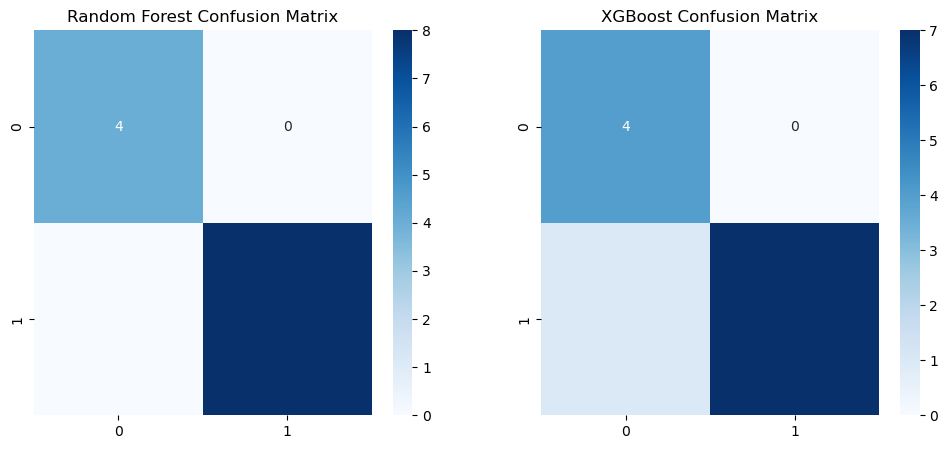

In [19]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train_combined and y_train_combined have already been prepared

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_combined, y_train_combined, test_size=0.2, random_state=42)

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict on the test set
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Calculate metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_classification_report = classification_report(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Calculate metrics for XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_classification_report = classification_report(y_test, xgb_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Print results
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_classification_report)
print("Random Forest ROC-AUC:", rf_roc_auc)

print("\nXGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", xgb_classification_report)
print("XGBoost ROC-AUC:", xgb_roc_auc)

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)
xgb_cm = confusion_matrix(y_test, xgb_pred)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')

plt.show()

## Performance Comparison of Random Forest and XGBoost Classifiers with Hyperparameter Tuning

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


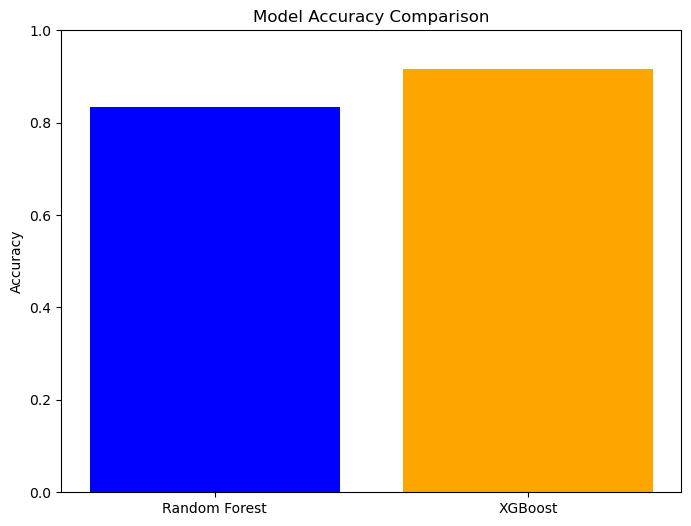

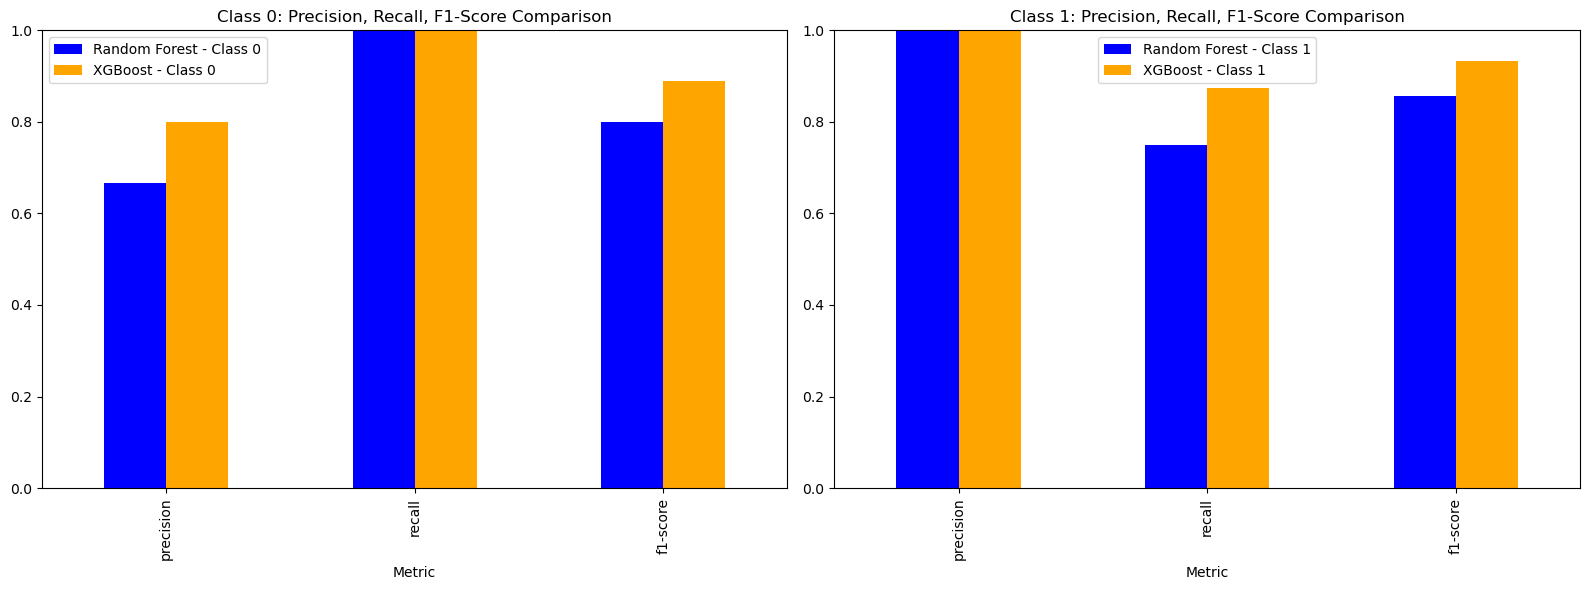

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=9, n_estimators=70; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=149; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=4, n_estimators=199; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=107; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=157; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=3, n_estimators=181; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=133; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=2, n_estimators=99; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=103; total ti

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform
from xgboost import XGBClassifier

# Assume X_train_combined and y_train_combined have been prepared
X_train, X_test, y_train, y_test = train_test_split(X_train_combined, y_train_combined, test_size=0.2, random_state=42)

# RandomForestClassifier model setup
param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
}

rf = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2)
random_search_rf.fit(X_train, y_train)
best_model_rf = random_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# XGBClassifier model setup
param_dist_xgb = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'min_child_weight': randint(1, 10)
}

xgb_model = XGBClassifier(random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2)
random_search_xgb.fit(X_train, y_train)
best_model_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

# Visualization
metrics = ['precision', 'recall', 'f1-score']

# Test Set Accuracy Comparison
accuracy_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_rf, accuracy_xgb]
})

# Precision, Recall, F1-Score Comparison for Each Class
class_labels = list(classification_rep_rf.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
comparison_df = pd.DataFrame({
    'Metric': metrics,
    'Random Forest - Class 0': [classification_rep_rf['0'][metric] for metric in metrics],
    'Random Forest - Class 1': [classification_rep_rf['1'][metric] for metric in metrics],
    'XGBoost - Class 0': [classification_rep_xgb['0'][metric] for metric in metrics],
    'XGBoost - Class 1': [classification_rep_xgb['1'][metric] for metric in metrics]
})

# Plotting Accuracy Comparison
plt.figure(figsize=(8, 6))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color=['blue', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Plotting Precision, Recall, F1-Score Comparison for Each Class
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
comparison_df[['Metric', 'Random Forest - Class 0', 'XGBoost - Class 0']].plot(x='Metric', kind='bar', ax=axes[0], color=['blue', 'orange'])
axes[0].set_title('Class 0: Precision, Recall, F1-Score Comparison')
axes[0].set_ylim(0, 1)

comparison_df[['Metric', 'Random Forest - Class 1', 'XGBoost - Class 1']].plot(x='Metric', kind='bar', ax=axes[1], color=['blue', 'orange'])
axes[1].set_title('Class 1: Precision, Recall, F1-Score Comparison')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()